In [1]:

# Step 1: Load the messy dataset
import pandas as pd

df = pd.read_csv("energy_raw.csv")
print("Original Data:")
print(df)

# Step 2: Count missing values
print("\nMissing values:")
print(df.isnull().sum())

# Step 3: Standardize country names and numeric fields
df["Country"] = df["Country"].str.strip().str.title()
df["%Renewable"] = pd.to_numeric(df["%Renewable"].str.replace("%", ""), errors="coerce")

# Step 4: Remove duplicates and unrealistic values
df = df.drop_duplicates()
df = df[df["%Renewable"] <= 100]

# Step 5: View cleaned data
print("\nCleaned Data:")
print(df)


Original Data:
     Country %Renewable         Region
0      Nepal         89           Asia
1     india          45           Asia
2      KENYA        NaN         Africa
3     Brazil        105  South America
4     Brazil        105  South America
5  Australia        NaN        Oceania
6    Germany         48         Europe
7      kenya        50%         africa

Missing values:
Country       0
%Renewable    2
Region        0
dtype: int64

Cleaned Data:
   Country  %Renewable  Region
0    Nepal        89.0    Asia
1    India        45.0    Asia
6  Germany        48.0  Europe
7    Kenya        50.0  africa


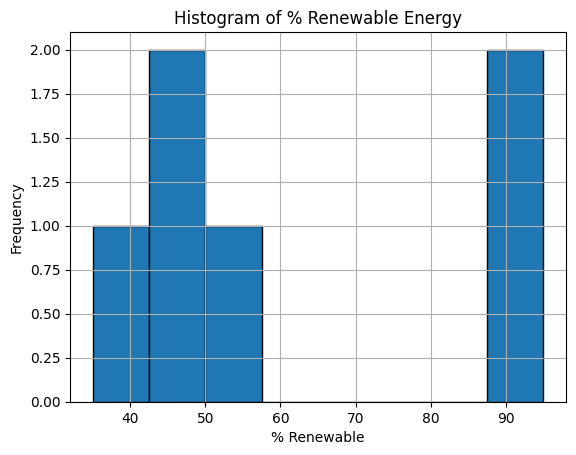

ModuleNotFoundError: No module named 'scipy'

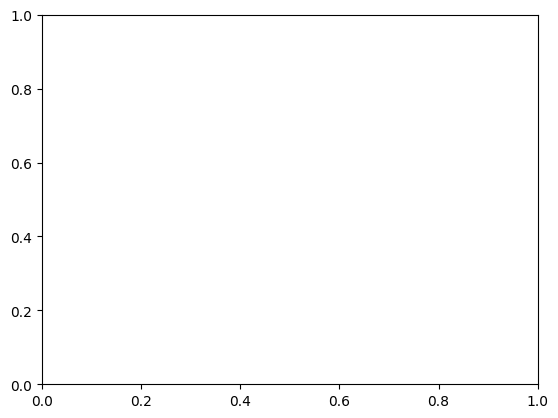

In [2]:

# Exploratory Data Analysis: Histograms and KDE

import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned data
df = pd.read_csv("energy_cleaned.csv")

# Histogram
df["%Renewable"].plot(kind="hist", bins=8, edgecolor="black")
plt.title("Histogram of % Renewable Energy")
plt.xlabel("% Renewable")
plt.grid(True)
plt.show()

# KDE plot
df["%Renewable"].plot(kind="density", linewidth=2)
plt.title("Density Plot of % Renewable Energy")
plt.xlabel("% Renewable")
plt.grid(True)
plt.show()

# KDE by Region (optional)
if "Region" in df.columns:
    df.groupby("Region")["%Renewable"].plot(kind="density", legend=True)
    plt.title("Density Plot by Region")
    plt.xlabel("% Renewable")
    plt.grid(True)
    plt.show()


In [3]:
!pip3 install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 8.1 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip


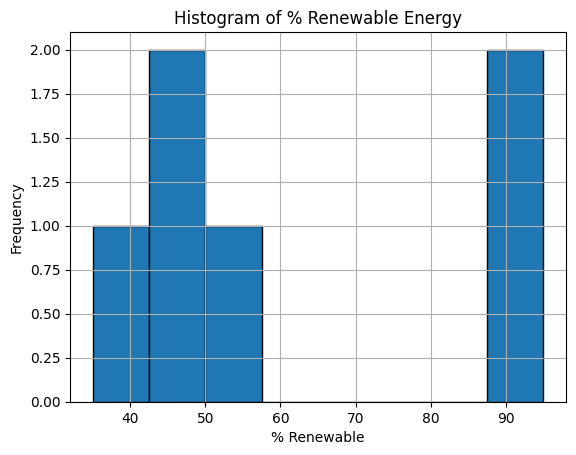

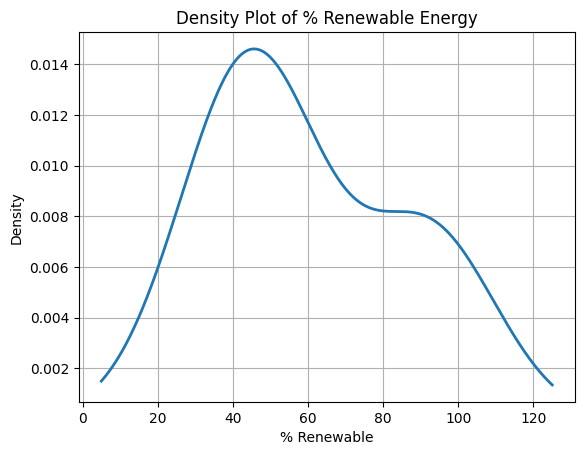

ValueError: `dataset` input should have multiple elements.

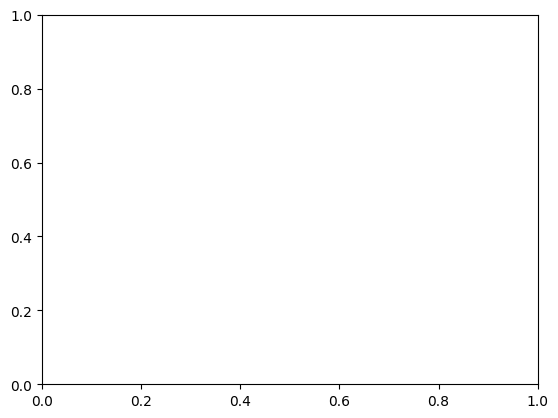

In [4]:

# Exploratory Data Analysis: Histograms and KDE

import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned data
df = pd.read_csv("energy_cleaned.csv")

# Histogram
df["%Renewable"].plot(kind="hist", bins=8, edgecolor="black")
plt.title("Histogram of % Renewable Energy")
plt.xlabel("% Renewable")
plt.grid(True)
plt.show()

# KDE plot (requires scipy)
df["%Renewable"].plot(kind="density", linewidth=2)
plt.title("Density Plot of % Renewable Energy")
plt.xlabel("% Renewable")
plt.grid(True)
plt.show()

# KDE by Region (optional)
if "Region" in df.columns:
    df.groupby("Region")["%Renewable"].plot(kind="density", legend=True)
    plt.title("Density Plot by Region")
    plt.xlabel("% Renewable")
    plt.grid(True)
    plt.show()


In [5]:
import pandas as pd

df = pd.read_csv("energy_cleaned.csv")
df.head()

,Country,%Renewable,Region
0,Nepal,89,Asia
1,India,45,Asia
2,Kenya,50,Africa
3,Brazil,95,South America
4,Australia,35,Oceania


In [6]:
import pandas as pd

df = pd.read_csv("energy_cleaned.csv")
df.head()
df.info() 
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Country     6 non-null      object
 1   %Renewable  6 non-null      int64 
 2   Region      6 non-null      object
dtypes: int64(1), object(2)
memory usage: 276.0+ bytes


,%Renewable
count,6.000000
mean,60.333333
std,25.136958
min,35.000000
25%,45.750000
50%,49.000000
75%,79.250000
max,95.000000


In [7]:
high_renew = df[df["%Renewable"] > 50]
print("Countries with >50% renewable energy:", len(high_renew))

Countries with >50% renewable energy: 2


In [8]:
high_renew = df[df["%Renewable"] > 20]
print("Countries with >20% renewable energy:", len(high_renew))

Countries with >20% renewable energy: 6


In [9]:
region_avg = df.groupby("Region")["%Renewable"].mean()
print(region_avg)

Region
Africa           50.0
Asia             67.0
Europe           48.0
Oceania          35.0
South America    95.0
Name: %Renewable, dtype: float64


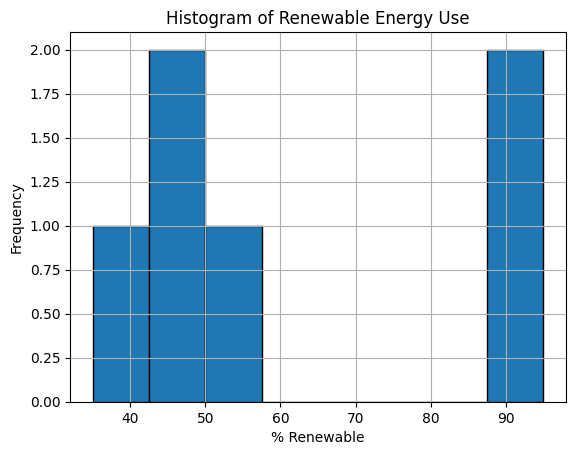

In [10]:
import matplotlib.pyplot as plt

df["%Renewable"].plot(kind="hist", bins=8, edgecolor="black")
plt.title("Histogram of Renewable Energy Use")
plt.xlabel("% Renewable")
plt.grid(True)
plt.show()


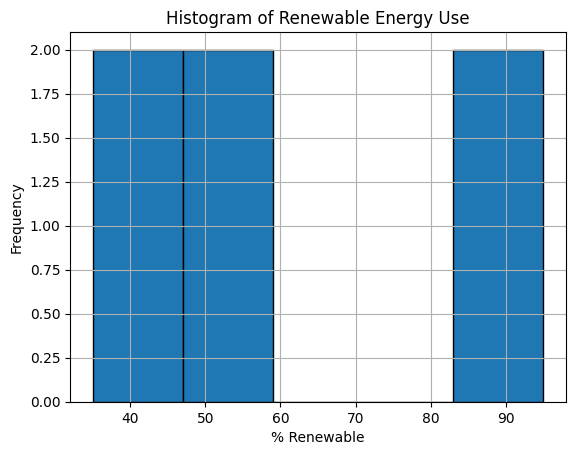

In [11]:
import matplotlib.pyplot as plt

df["%Renewable"].plot(kind="hist", bins=5, edgecolor="black")
plt.title("Histogram of Renewable Energy Use")
plt.xlabel("% Renewable")
plt.grid(True)
plt.show()


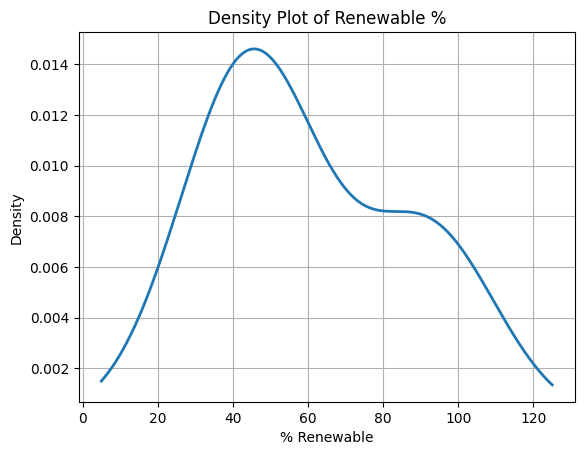

In [12]:
df["%Renewable"].plot(kind="density", linewidth=2)
plt.title("Density Plot of Renewable %")
plt.xlabel("% Renewable")
plt.grid(True)
plt.show()

ValueError: `dataset` input should have multiple elements.

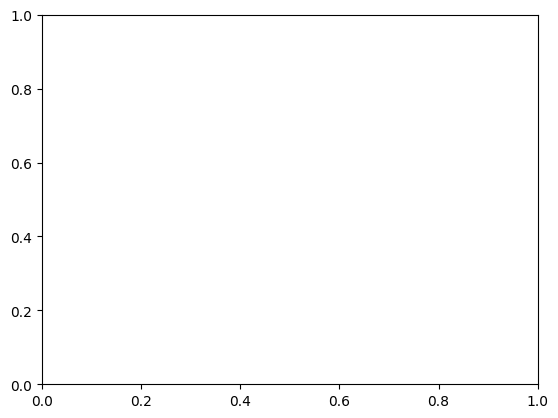

In [13]:
df.groupby("Region")["%Renewable"].plot(kind="density", legend=True)
plt.title("Renewable Energy by Region")
plt.xlabel("% Renewable")
plt.grid(True)
plt.show()

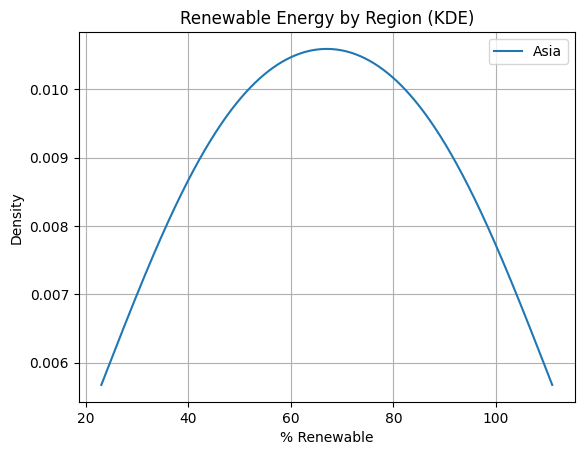

In [14]:
for region, group in df.groupby("Region"):
    if len(group) >= 2:
        group["%Renewable"].plot(kind="density", label=region)

plt.title("Renewable Energy by Region (KDE)")
plt.xlabel("% Renewable")
plt.legend()
plt.grid(True)
plt.show()

In [15]:

# --- Bayes' Theorem Example in Python ---

# P(A): probability of power blackout
P_blackout = 0.10

# P(B | A): probability of heatwave on blackout days
P_heatwave_given_blackout = 0.80

# P(B): overall probability of heatwave
P_heatwave = 0.30

# Bayes' Theorem: P(A | B) = [P(B | A) * P(A)] / P(B)
P_blackout_given_heatwave = (P_heatwave_given_blackout * P_blackout) / P_heatwave

# Display result
print("Probability of blackout given heatwave:", round(P_blackout_given_heatwave, 3))


Probability of blackout given heatwave: 0.267


In [16]:

# Scenario:
# You are assessing whether a country qualifies for Policy A.
# Policy A is designed to reward countries with high renewable energy use
# and low CO₂ emissions per capita.

# Country data (you can modify these values below)
country_name = "Nepal"
percent_renewable = 60
co2_emissions = 1.8
region = "Asia"

# Define logical conditions
is_high_renewable = percent_renewable > 50
is_low_emission = co2_emissions < 2

# Combined logical proposition using AND
if is_high_renewable and is_low_emission:
    print(f"{country_name} qualifies for Policy A")
else:
    print(f"{country_name} does not qualify for Policy A")

# Display Boolean values for learning
print("High Renewable:", is_high_renewable)
print("Low Emission:", is_low_emission)


Nepal qualifies for Policy A
High Renewable: True
Low Emission: True


In [17]:

# Scenario:
# You are assessing whether a country qualifies for Policy A.
# Policy A is designed to reward countries with high renewable energy use
# and low CO₂ emissions per capita.

# Country data (you can modify these values below)
country_name = "Nepal"
percent_renewable = 60
co2_emissions = 1.8
region = "Asia"

# Define logical conditions
is_high_renewable = percent_renewable > 45
is_low_emission = co2_emissions < 2

# Combined logical proposition using AND
if is_high_renewable and is_low_emission:
    print(f"{country_name} qualifies for Policy A")
else:
    print(f"{country_name} does not qualify for Policy A")

# Display Boolean values for learning
print("High Renewable:", is_high_renewable)
print("Low Emission:", is_low_emission)


Nepal qualifies for Policy A
High Renewable: True
Low Emission: True


In [18]:

# Scenario:
# You are assessing whether a country qualifies for Policy A.
# Policy A is designed to reward countries with high renewable energy use
# and low CO₂ emissions per capita.

# Country data (you can modify these values below)
country_name = "Nepal"
percent_renewable = 60
co2_emissions = 1.8
region = "Asia"
country_name = "USA"
percent_renewable = 20
co2_emissions = 1.1
region = "America"

# Define logical conditions
is_high_renewable = percent_renewable > 50
is_low_emission = co2_emissions < 2

# Combined logical proposition using AND
if is_high_renewable and is_low_emission:
    print(f"{country_name} qualifies for Policy A")
else:
    print(f"{country_name} does not qualify for Policy A")

# Display Boolean values for learning
print("High Renewable:", is_high_renewable)
print("Low Emission:", is_low_emission)


USA does not qualify for Policy A
High Renewable: False
Low Emission: True


In [19]:

# Scenario: Apply logic-based policy rules to simulated country data

country = "Kenya"
percent_renewable = 55      # % of energy from renewables
co2_emissions = 1.6         # tonnes per capita
region = "Africa"
is_low_income = True

# Inference Rule (Modus Ponens style):
# If renewable > 50 and emissions < 2, then country qualifies for Policy A
if percent_renewable > 50 and co2_emissions < 2:
    print(f"{country} qualifies for Policy A.")
else:
    print(f"{country} does not qualify for Policy A.")

# Inference Chain:
# If Policy A applies and the country is in Africa or is low income, flag for fast-track aid
if percent_renewable > 50 and co2_emissions < 2:
    if region == "Africa" or is_low_income:
        print(f"{country} should be fast-tracked for funding support.")

# Explain the logic in Boolean values
print("\n--- Truth Table Output ---")
print("High Renewable:", percent_renewable > 50)
print("Low Emissions:", co2_emissions < 2)
print("Is in Africa:", region == "Africa")
print("Is Low Income:", is_low_income)


Kenya qualifies for Policy A.
Kenya should be fast-tracked for funding support.

--- Truth Table Output ---
High Renewable: True
Low Emissions: True
Is in Africa: True
Is Low Income: True


In [20]:

# Scenario: Apply logic-based policy rules to simulated country data

country = "Kenya"
percent_renewable = 55      # % of energy from renewables
co2_emissions = 1.6         # tonnes per capita
region = "Africa"
is_low_income = True

# Inference Rule (Modus Ponens style):
# If renewable > 50 and emissions < 2, then country qualifies for Policy A
if percent_renewable > 50 and co2_emissions < 2:
    print(f"{country} qualifies for Policy A.")
else:
    print(f"{country} does not qualify for Policy A.")

# Inference Chain:
# If Policy A applies and the country is in Africa or is low income, flag for fast-track aid
if percent_renewable > 50 and co2_emissions < 2:
    if region == "Europe" or is_low_income:
        print(f"{country} should be fast-tracked for funding support.")

# Explain the logic in Boolean values
print("\n--- Truth Table Output ---")
print("High Renewable:", percent_renewable > 50)
print("Low Emissions:", co2_emissions < 2)
print("Is in Africa:", region == "Africa")
print("Is Low Income:", is_low_income)


Kenya qualifies for Policy A.
Kenya should be fast-tracked for funding support.

--- Truth Table Output ---
High Renewable: True
Low Emissions: True
Is in Africa: True
Is Low Income: True


In [21]:

# Scenario: Apply logic-based policy rules to simulated country data

country = "Kenya"
percent_renewable = 55      # % of energy from renewables
co2_emissions = 1.6         # tonnes per capita
region = "Africa"
is_low_income = True

# Inference Rule (Modus Ponens style):
# If renewable > 50 and emissions < 2, then country qualifies for Policy A
if percent_renewable > 45 and co2_emissions < 2:
    print(f"{country} qualifies for Policy A.")
else:
    print(f"{country} does not qualify for Policy A.")

# Inference Chain:
# If Policy A applies and the country is in Africa or is low income, flag for fast-track aid
if percent_renewable > 50 and co2_emissions < 2:
    if region == "Africa" or is_low_income:
        print(f"{country} should be fast-tracked for funding support.")

# Explain the logic in Boolean values
print("\n--- Truth Table Output ---")
print("High Renewable:", percent_renewable > 50)
print("Low Emissions:", co2_emissions < 2)
print("Is in Africa:", region == "Africa")
print("Is Low Income:", is_low_income)


Kenya qualifies for Policy A.
Kenya should be fast-tracked for funding support.

--- Truth Table Output ---
High Renewable: True
Low Emissions: True
Is in Africa: True
Is Low Income: True


In [22]:

# Scenario: Apply logic-based policy rules to simulated country data

country = "Kenya"
percent_renewable = 45      # % of energy from renewables
co2_emissions = 1.6         # tonnes per capita
region = "Africa"
is_low_income = True

# Inference Rule (Modus Ponens style):
# If renewable > 50 and emissions < 2, then country qualifies for Policy A
if percent_renewable > 50 and co2_emissions < 2:
    print(f"{country} qualifies for Policy A.")
else:
    print(f"{country} does not qualify for Policy A.")

# Inference Chain:
# If Policy A applies and the country is in Africa or is low income, flag for fast-track aid
if percent_renewable > 50 and co2_emissions < 2:
    if region == "Africa" or is_low_income:
        print(f"{country} should be fast-tracked for funding support.")

# Explain the logic in Boolean values
print("\n--- Truth Table Output ---")
print("High Renewable:", percent_renewable > 50)
print("Low Emissions:", co2_emissions < 2)
print("Is in Africa:", region == "Africa")
print("Is Low Income:", is_low_income)


Kenya does not qualify for Policy A.

--- Truth Table Output ---
High Renewable: False
Low Emissions: True
Is in Africa: True
Is Low Income: True


In [23]:

# Scenario: Apply logic-based policy rules to simulated country data

country = "Kenya"
percent_renewable = 55      # % of energy from renewables
co2_emissions = 1.6         # tonnes per capita
region = "Europe"
is_low_income = True

# Inference Rule (Modus Ponens style):
# If renewable > 50 and emissions < 2, then country qualifies for Policy A
if percent_renewable > 50 and co2_emissions < 2:
    print(f"{country} qualifies for Policy A.")
else:
    print(f"{country} does not qualify for Policy A.")

# Inference Chain:
# If Policy A applies and the country is in Africa or is low income, flag for fast-track aid
if percent_renewable > 50 and co2_emissions < 2:
    if region == "Africa" or is_low_income:
        print(f"{country} should be fast-tracked for funding support.")

# Explain the logic in Boolean values
print("\n--- Truth Table Output ---")
print("High Renewable:", percent_renewable > 50)
print("Low Emissions:", co2_emissions < 2)
print("Is in Africa:", region == "Africa")
print("Is Low Income:", is_low_income)


Kenya qualifies for Policy A.
Kenya should be fast-tracked for funding support.

--- Truth Table Output ---
High Renewable: True
Low Emissions: True
Is in Africa: False
Is Low Income: True


In [24]:

# Manual simulation of a decision tree

# Example country data (change values to test different paths)
country = "Bhutan"
percent_renewable = 85
co2_emissions = 1.1

# Simulated decision tree structure
if percent_renewable > 50:
    if co2_emissions < 2:
        classification = "Policy A"
    else:
        classification = "Policy B"
else:
    if co2_emissions < 2:
        classification = "Policy C"
    else:
        classification = "No Policy"

# Output the result
print(f"{country} is classified under: {classification}")

# Show decision path
print("\n--- Decision Path ---")
print("High Renewable:", percent_renewable > 50)
print("Low CO₂ Emissions:", co2_emissions < 2)


Bhutan is classified under: Policy A

--- Decision Path ---
High Renewable: True
Low CO₂ Emissions: True


In [25]:

# Manual simulation of a decision tree

# Example country data (change values to test different paths)
country = "Bhutan"
percent_renewable = 45
co2_emissions = 1.1

# Simulated decision tree structure
if percent_renewable > 50:
    if co2_emissions < 2:
        classification = "Policy A"
    else:
        classification = "Policy B"
else:
    if co2_emissions < 2:
        classification = "Policy C"
    else:
        classification = "No Policy"

# Output the result
print(f"{country} is classified under: {classification}")

# Show decision path
print("\n--- Decision Path ---")
print("High Renewable:", percent_renewable > 50)
print("Low CO₂ Emissions:", co2_emissions < 2)


Bhutan is classified under: Policy C

--- Decision Path ---
High Renewable: False
Low CO₂ Emissions: True


In [26]:

# Build and visualize a decision tree without external data

import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Step 1: Simulated dataset (small, hardcoded)
data = {
    "Country": ["Nepal", "Kenya", "Germany", "India", "Australia", "Brazil"],
    "%Renewable": [88, 65, 45, 25, 35, 80],
    "CO2_per_capita": [1.2, 1.8, 6.5, 1.9, 17.0, 2.1],
    "Apply_Policy": ["yes", "yes", "no", "yes", "no", "yes"]
}

df = pd.DataFrame(data)

# Step 2: Encode the label for modeling
df["Label"] = df["Apply_Policy"].map({"yes": 1, "no": 0})

# Step 3: Define features and target
X = df[["%Renewable", "CO2_per_capita"]]
y = df["Label"]

# Step 4: Train the decision tree
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X, y)

# Step 5: Visualize the tree
plt.figure(figsize=(10, 6))
plot_tree(tree, feature_names=X.columns, class_names=["No", "Yes"], filled=True, rounded=True)
plt.title("Decision Tree – Apply Policy A")
plt.show()


ModuleNotFoundError: No module named 'sklearn'

In [27]:
!pip3 install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 7.4 MB/s eta 0:00:00 0:00:01

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip


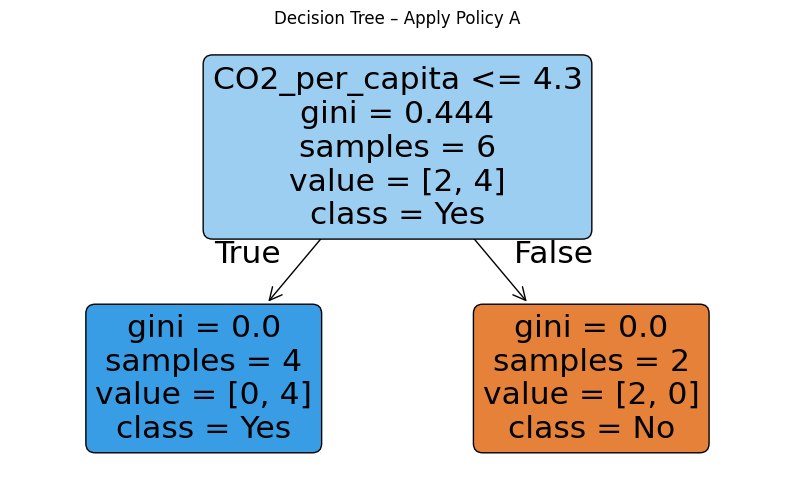

In [28]:

# Build and visualize a decision tree without external data

import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Step 1: Simulated dataset (small, hardcoded)
data = {
    "Country": ["Nepal", "Kenya", "Germany", "India", "Australia", "Brazil"],
    "%Renewable": [88, 65, 45, 25, 35, 80],
    "CO2_per_capita": [1.2, 1.8, 6.5, 1.9, 17.0, 2.1],
    "Apply_Policy": ["yes", "yes", "no", "yes", "no", "yes"]
}

df = pd.DataFrame(data)

# Step 2: Encode the label for modeling
df["Label"] = df["Apply_Policy"].map({"yes": 1, "no": 0})

# Step 3: Define features and target
X = df[["%Renewable", "CO2_per_capita"]]
y = df["Label"]

# Step 4: Train the decision tree
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X, y)

# Step 5: Visualize the tree
plt.figure(figsize=(10, 6))
plot_tree(tree, feature_names=X.columns, class_names=["No", "Yes"], filled=True, rounded=True)
plt.title("Decision Tree – Apply Policy A")
plt.show()
